**Задача 1.** Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

import itertools
import warnings


from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [2]:
brent = pd.read_csv('my_BRENT2019.csv', index_col=[0], parse_dates = [0])
brent.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [3]:
brent = brent.asfreq('1D', method = 'pad')

In [4]:
brent.shape

(3288, 11)

**Задача 2.** Добавьте первые разности по стоимости доллара и евро к рублю


In [5]:
rub_doll=pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx')
rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_doll.head()

,curs
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [6]:
rub_doll.shape

(2228, 1)

In [7]:
rub_doll = rub_doll.asfreq('1D', method = 'pad')
rub_doll.shape

(3287, 1)

In [8]:
brent['doll'] = rub_doll['curs']

In [9]:
brent.tail()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,doll
Дата,,,,,,,,,,,,
2019-08-28,59.84,2019,8,28,3,240,35,2,0,0,0,66.2608
2019-08-29,60.37,2019,8,29,3,241,35,3,0,0,0,66.4127
2019-08-30,59.19,2019,8,30,3,242,35,4,0,0,0,66.7471
2019-08-31,59.19,2019,8,30,3,242,35,4,0,0,0,66.4897
2019-09-01,58.84,2019,9,1,3,244,35,6,0,1,0,NaN


In [10]:
brent.loc[brent.index[-1], 'doll'] = brent.loc[brent.index[-2], 'doll'] # 1 сентября 2019 года неторговый день

In [11]:
brent.tail()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,doll
Дата,,,,,,,,,,,,
2019-08-28,59.84,2019,8,28,3,240,35,2,0,0,0,66.2608
2019-08-29,60.37,2019,8,29,3,241,35,3,0,0,0,66.4127
2019-08-30,59.19,2019,8,30,3,242,35,4,0,0,0,66.7471
2019-08-31,59.19,2019,8,30,3,242,35,4,0,0,0,66.4897
2019-09-01,58.84,2019,9,1,3,244,35,6,0,1,0,66.4897


**Задача 3.** сделайте ее перрасчет (ресемплинг) в представление по неделям. 


In [12]:
brent = brent.resample('W').mean()

In [13]:
brent_data = brent.copy()

In [14]:
brent_data['Значение'] = brent_data['Значение'].diff(1)
brent_data['doll'] = brent_data['doll'].diff(1)

brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,doll
Дата,,,,,,,,,,,,
2010-09-05,NaN,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000,NaN
2010-09-12,1.155429,2010.0,9.000000,8.857143,3.000000,251.857143,36.0,2.857143,0.142857,0.0,0.142857,0.046274
2010-09-19,0.818571,2010.0,9.000000,15.857143,3.000000,258.857143,37.0,2.857143,0.000000,0.0,0.000000,0.093414
2010-09-26,-0.031429,2010.0,9.000000,22.857143,3.000000,265.857143,38.0,2.857143,0.000000,0.0,0.000000,0.116671
2010-10-03,3.024286,2010.0,9.428571,17.000000,3.428571,272.857143,39.0,2.857143,0.000000,0.0,0.000000,-0.418714


In [15]:
brent_data = brent_data.fillna(0)

brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,doll
Дата,,,,,,,,,,,,
2010-09-05,0.000000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000,0.000000
2010-09-12,1.155429,2010.0,9.000000,8.857143,3.000000,251.857143,36.0,2.857143,0.142857,0.0,0.142857,0.046274
2010-09-19,0.818571,2010.0,9.000000,15.857143,3.000000,258.857143,37.0,2.857143,0.000000,0.0,0.000000,0.093414
2010-09-26,-0.031429,2010.0,9.000000,22.857143,3.000000,265.857143,38.0,2.857143,0.000000,0.0,0.000000,0.116671
2010-10-03,3.024286,2010.0,9.428571,17.000000,3.428571,272.857143,39.0,2.857143,0.000000,0.0,0.000000,-0.418714


**Задача 4.** Постройте модель предсказания 1-й точки от текущей (h=1).


In [16]:
p =3

#добавляем историю длиной р
for i in range(p):
    brent_data['doll_t'+str(p-i+1)]=0.0
    brent_data['doll_t'+str(p-i+1)].values[p+2:] = brent_data['doll'].values[i+1:-(p-i+1)]

In [17]:
scl_target=StandardScaler() 

h=1
target = brent_data["Значение"].values[h:].reshape((brent_data.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(469, 1)

In [18]:
scl_x=StandardScaler() 

X = brent_data.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(469, 15)

In [19]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(469, 5)

In [20]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(469, 2)

In [21]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(469, 5)

In [22]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [0 2 4 5 6]
Номера признаков лучших признаков по процентной форме:  [0 2]
Номера признаков для выбора по модели :  [ 0 11 12 13 14]


In [23]:
X_new = X[:,[0,2,4,5,7,11,12,14]]

In [24]:
# сделаем функцию
def split_data( data, split_date ):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()

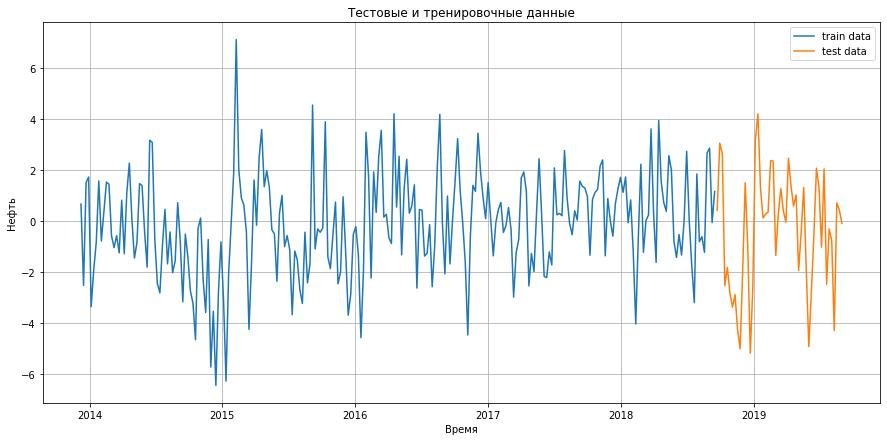

In [25]:
N_x = -300
N_split = -50

train, test = split_data( brent_data[N_x:], N_split)

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Нефть')
plt.plot(train.index,train.iloc[:,0], label='train data' )
plt.plot(test.index,test.iloc[:,0], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.grid()
plt.legend()
plt.show()

In [26]:
X_train =X_new[N_x:N_split,:]
y_train =y[N_x:N_split,0]
X_test =X_new[N_split:,:]
y_test =y[N_split:,0]

In [27]:
train.shape

(250, 15)

In [28]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=10, n_estimators=1000)
model_l = LinearRegression()

In [29]:
model_l.fit( X_train, y_train ) 
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
X_test.shape

(50, 8)

In [31]:
y_pred_g = model_g.predict(X_train)
y_pred_l= model_l.predict(X_train)

y_test_pred_g = model_g.predict(X_test)
y_test_pred_l= model_l.predict(X_test)

In [32]:
modb_optd = sm.tsa.statespace.SARIMAX(endog = y_train, exog = X_train,
                               order=[0,0,1],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)

resultsb_optd = modb_optd.fit()

pred_dynamic_opt = resultsb_optd.predict(start = len(y_train), end = len(y_train) + len(y_test) - h, exog = X_test) 

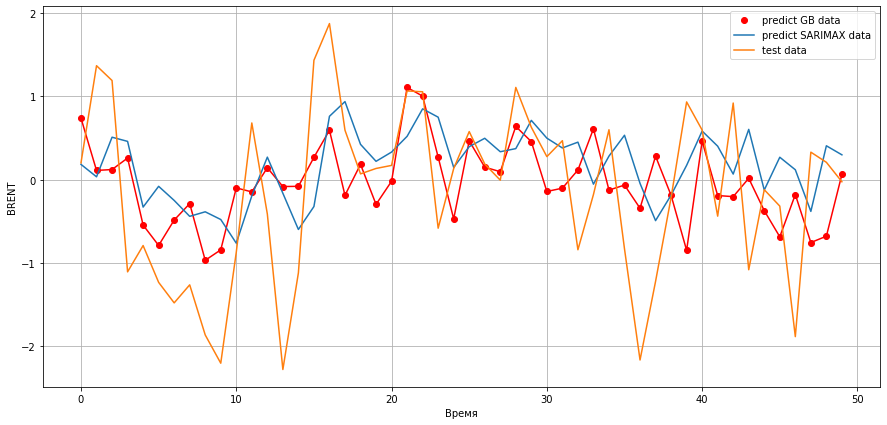

In [33]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g[:100],'or', label='predict GB data' )
plt.plot(y_test_pred_g[:100],'r' )
plt.plot(pred_dynamic_opt[:100], label='predict SARIMAX data' )
plt.plot(y_test[:100], label='test data')
plt.grid()
plt.legend()
plt.show()

In [34]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),
                               y_pred = scl_target.inverse_transform( y_test_pred_g))

136.33509312692928

In [36]:
mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),
                               y_pred = scl_target.inverse_transform( pred_dynamic_opt))

142.970348941044

In [37]:
mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),
                               y_pred = scl_target.inverse_transform( y_test_pred_l))

106.68952567569625

In [38]:
y_pred = scl_target.inverse_transform( y_test_pred_l)
y_pred

array([-0.05869198, -0.35061106,  0.7489683 ,  0.63530367, -1.23249538,
       -0.61924224, -1.04162258, -1.49537692, -1.39040709, -1.60511994,
       -2.25114034, -0.9656401 ,  0.15160997, -0.88687198, -1.89707805,
       -1.29354083,  1.24965194,  1.69263049,  0.48687996,  0.0066046 ,
        0.27034641,  0.7179105 ,  1.4759036 ,  1.23515681, -0.18438365,
        0.39056717,  0.62651438,  0.26579932,  0.32709366,  1.11740268,
        0.62262627,  0.34294695,  0.49566666, -0.69677093,  0.09113449,
        0.68424104, -0.67822947, -1.73670297, -1.01925242, -0.17196175,
        0.79483833,  0.36955181, -0.43529915,  0.83352809, -0.87747574,
        0.03222618, -0.3378513 , -1.52662036,  0.3274987 ,  0.05602763])

In [39]:
brent_result = pd.DataFrame()

In [40]:
brent_result['Test'] = brent.loc[brent.index[-51:],'Значение']

In [49]:
brent_result.loc[brent_result.index[1:], 'Dif'] = y_pred

In [53]:
brent_result['Result'] = brent_result['Test']

for i in range(1, len(brent_result)): 
    brent_result.loc[brent_result.index[i], 'Result'] = brent_result.loc[brent_result.index[i-1], 'Result'] + brent_result.loc[brent_result.index[i], 'Dif']

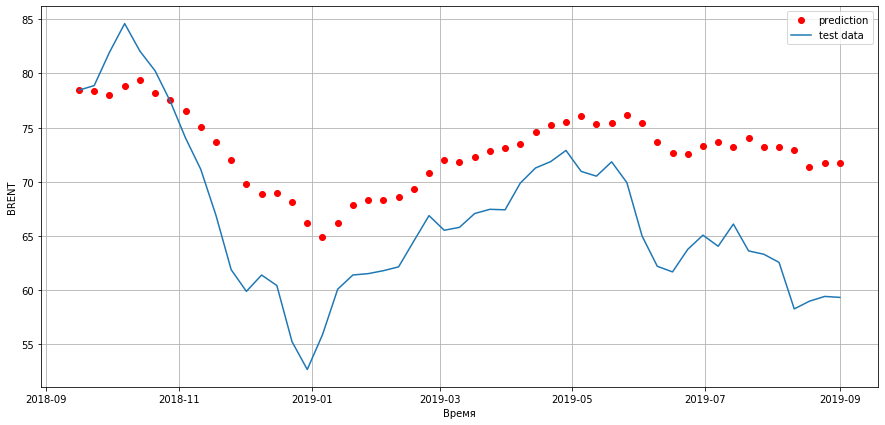

In [55]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(brent_result['Result'], 'or', label='prediction' )
plt.plot(brent_result['Test'], label = 'test data')
plt.grid()
plt.legend()
plt.show()

In [57]:
mean_absolute_percentage_error(y_true = brent_result.loc[brent_result.index[1:], 'Test'],
                               y_pred = brent_result.loc[brent_result.index[1:], 'Result'])

11.17388601809546

**Задача 5.** Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

In [60]:
sm.tsa.stattools.adfuller(brent_result.loc[brent_result.index[1:], 'Dif'].values)

(-1.8839694165454115,
 0.3396395723140415,
 5,
 44,
 {'1%': -3.5885733964124715,
  '5%': -2.929885661157025,
  '10%': -2.6031845661157025},
 93.02821795143635)

**Вывод:** Из результата теста Дики-Фуллера видно, что ряд первых разностей является нестационарным (0,34). Поэтому прогноз цены Brent оставляет желать лучшего.